In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine =load_wine()

In [3]:
wine.target.shape

(178,)

In [4]:
wine.data.shape

(178, 13)

In [5]:
import pandas as pd

In [6]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [10]:
Xtrain.shape

(124, 13)

In [11]:
Xtest.shape

(54, 13)

In [12]:
Ytest

array([2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 2])

In [13]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)

In [14]:
score

0.9629629629629629

In [15]:
import graphviz

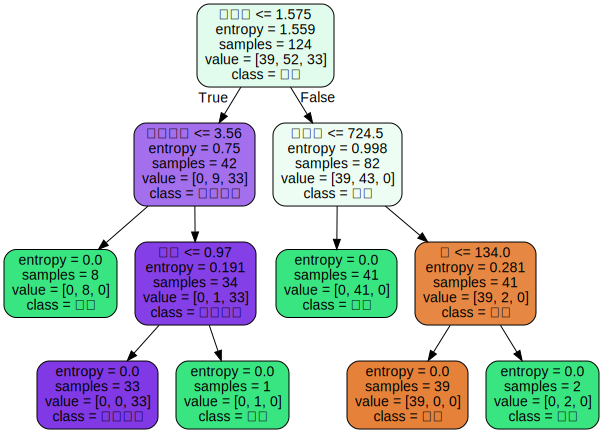

In [16]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
              ,'花青素','颜色强度','色调','od288/od315稀释葡萄酒','脯氨酸']
   
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['清酒','雪莉','贝尔摩得']
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

In [17]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.05964221,
       0.        , 0.41365159, 0.        , 0.        , 0.12919834,
       0.03367134, 0.        , 0.36383652])

In [18]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0596422100984996),
 ('总酚', 0.0),
 ('类黄酮', 0.4136515894607331),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.12919834229067206),
 ('色调', 0.033671342842426885),
 ('od288/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3638365153076684)]

In [19]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=30
#                                  ,splitter='random'
                               )
clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
score

0.9814814814814815

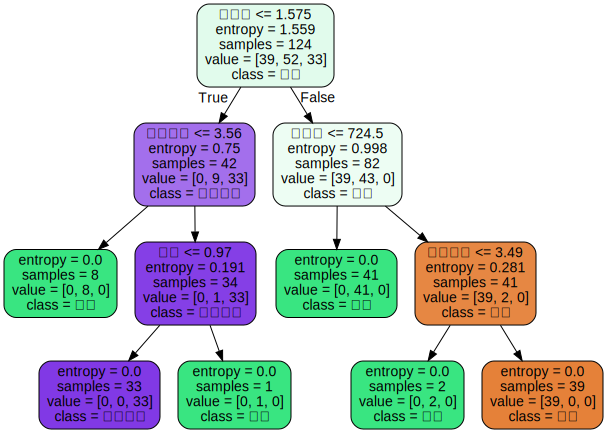

In [20]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
              ,'花青素','颜色强度','色调','od288/od315稀释葡萄酒','脯氨酸']
   
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['清酒','雪莉','贝尔摩得']
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

In [21]:
# 训练的数据在训练集表现如何
score_train=clf.score(Xtrain,Ytrain)
score_train

1.0

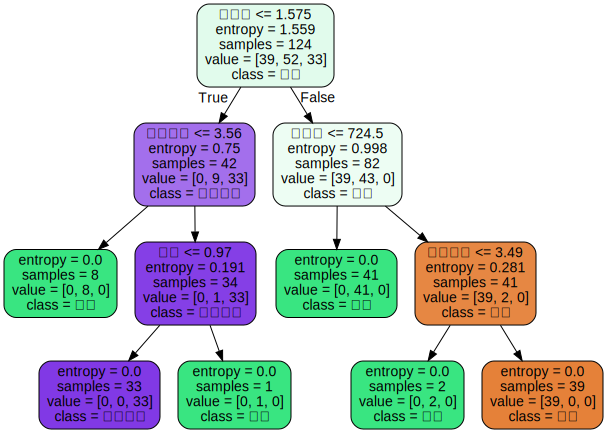

In [45]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=30
                                 ,splitter='best'
                                ,max_depth=4
#                                 ,min_samples_leaf=10
#                                 ,min_samples_split=40
                               )
clf.fit(Xtrain,Ytrain)

feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类'
              ,'花青素','颜色强度','色调','od288/od315稀释葡萄酒','脯氨酸']
   
dot_data=tree.export_graphviz(clf
                             ,feature_names=feature_name
                             ,class_names=['清酒','雪莉','贝尔摩得']
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

In [46]:
score=clf.score(Xtest,Ytest)
score

0.9814814814814815

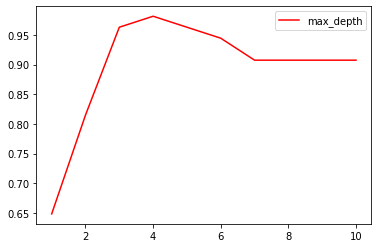

In [37]:
# t调优
import matplotlib.pyplot as plt
test=[]

for i in range(10):
    clf=tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion='entropy'
                                    ,random_state=30
                                    ,splitter='random'
                                   )
    clf=clf.fit(Xtrain,Ytrain)
    score=clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color='red',label="max_depth")
plt.legend()
plt.show()

In [47]:
clf.apply(Xtest)

array([ 4,  4,  4,  7,  4, 10, 10,  4,  7,  4,  7,  7,  5,  4,  4, 10, 10,
        7, 10,  7, 10, 10, 10,  9,  7,  4, 10, 10, 10,  9, 10,  4,  7,  2,
        4, 10,  7, 10, 10,  7,  7, 10,  7,  2,  4, 10,  4, 10,  4, 10,  2,
        7,  5,  4], dtype=int64)

In [48]:
clf.predict(Xtest)

array([2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 2])

In [50]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston=load_boston()

In [53]:
regressor=DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10
               ,scoring='neg_mean_squared_error'
               )

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

In [1]:
# 回归树拟合正弦曲线
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [8]:
rng = np.random.RandomState(1)


In [9]:
# 生成0-5之间随机数
X=np.sort(5*rng.rand(80,1),axis=0)

In [15]:
# 降维函数ravel()
y=np.sin(X).ravel()   

In [17]:
# 正弦曲线加噪声4
y[::5]+=3*(0.5-rng.rand(16))

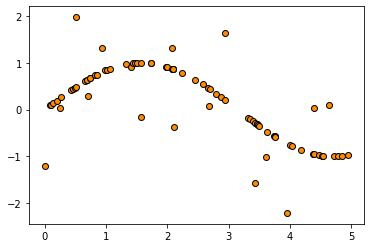

In [18]:
plt.figure()
plt.scatter(X,y,edgecolors='black',c='darkorange',label='data')

In [19]:
reg1=DecisionTreeRegressor(max_depth=2)
reg2=DecisionTreeRegressor(max_depth=5)
reg1.fit(X,y)
reg2.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
# 测试集 生成有序序列 np.newaxis增维
X_test=np.arange(0,5,0.01)[:,np.newaxis]

In [24]:
y1=reg1.predict(X_test)
y2=reg2.predict(X_test)


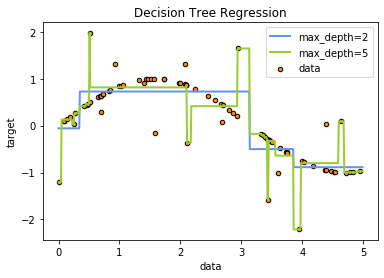

In [26]:
plt.figure()
plt.scatter(X,y,s=20,edgecolors='black',c='darkorange',label='data')
plt.plot(X_test,y1,color='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y2,color='yellowgreen',label='max_depth=5',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()   
plt.show()
# legend  图例 scatter散点图 深度过大5是过拟合